# Исследование закономерностей, определяющих успешность игры
В вашем распоряжении исторические данные до 2016 г. о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Информация получена из открытых источников.\
Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.\
Исследование проводится в декабре 2016 г. для кампании на 2017-й.

**Описание данных:**
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Цель исследования**\
*1) Проведите исследовательский анализ данных:*
  * сколько игр выпускалось в разные годы,
  * за какой характерный срок появляются новые и исчезают старые платформы,
  * какие платформы лидируют по продажам, растут или падают,
  * оценить влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков,
  * какие жанры самые прибыльные, выделяются ли жанры с высокими и низкими продажами.
  
*2) Составить портрет пользователя каждого региона:*\
Определить для пользователя каждого региона (NA, EU, JP):
  * самые популярные платформы (топ-5). Опишите различия в долях продаж.
  * самые популярные жанры (топ-5). Поясните разницу.
  * влияет ли рейтинг ESRB на продажи в отдельном регионе?

*3) Проверьте гипотезы:*
 * средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 * средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import random
import seaborn as sns

from math import factorial
from scipy import stats as st
from scipy.stats import norm

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
#Явные дубликаты отсутствуют
data.duplicated().sum()

0

Датафрейм содержит 11 столбцов и 16715 строк. Тип данных в столбцах - object и float64. Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.
Столбцы, имеющие пропуски:
* Name, 
* Year_of_Release, 
* Genre, Critic_Score, 
* User_Score,
* Rating.
В названиях колонок видны нарушения стиля: строчные буквы сочетаются с прописными.
Чтобы приступить к анализу данных, необходимо устранить выявленные проблемы в данных.

### Предобработка данных

#### Замените названия столбцов (приведите к нижнему регистру)

In [6]:
data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

Преобразуем столбец `year_of_release` к типу *integer*, а столбец `user_score` к типу *float*

In [7]:
data['year_of_release'].isna().value_counts()

False    16446
True       269
Name: year_of_release, dtype: int64

In [8]:
data['year_of_release'] = data['year_of_release'].astype('Int64',errors='ignore')

In [9]:
data = data.query('~year_of_release.isna()').reset_index()

В столбце `year_of_release` пропущено 1,6% занчений. 
Полагаем, что:
* заполнять данные средними или медианами является некорректным, 
* пропущенные значения не окажут существенное влияние на результат дальнейшего анализа, 
* % пропущенных значений несущественный. 

Вывод: данных достаточно для анализа, удалим пропущенные значения в столбце `year_of_release`.

In [10]:
data['user_score'].isna().value_counts()

False    9839
True     6607
Name: user_score, dtype: int64

In [11]:
data['user_score'] = data['user_score'].astype('float64',errors='ignore')

In [12]:
#check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16446 non-null  int64  
 1   name             16444 non-null  object 
 2   platform         16446 non-null  object 
 3   year_of_release  16446 non-null  Int64  
 4   genre            16444 non-null  object 
 5   na_sales         16446 non-null  float64
 6   eu_sales         16446 non-null  float64
 7   jp_sales         16446 non-null  float64
 8   other_sales      16446 non-null  float64
 9   critic_score     7983 non-null   float64
 10  user_score       9839 non-null   object 
 11  rating           9768 non-null   object 
dtypes: Int64(1), float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [13]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**Вывод:**\
Столец `year_of_release` приведен к типу *int*, т.к. для числовых значений формат *object* некорректный.\
Тип столбца `user_score` не изменился, т.к. содержит пропущенные значения и значения "tbd". Необходимо выполнить обработку пропущенных значений для преобразования данных в нужный тип.

#### Найдем и изучим пропущенные значения в столбцах

**Определим, в каких столбцах есть пропуски:**

In [14]:
data.isna().sum()

index                 0
name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

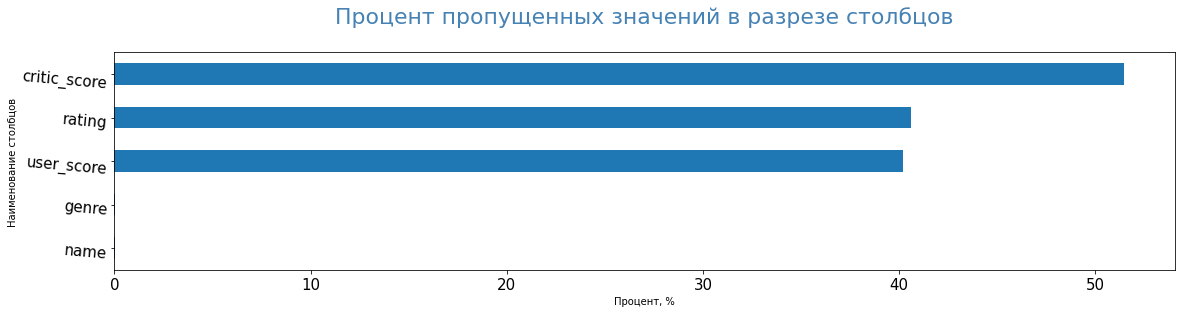

In [15]:
(
    (data.isna().mean()*100)
.to_frame()
.rename(columns = {0:'space'})
.query('space > 0')
.sort_values(by = 'space', ascending = True)
.plot(kind = 'barh', figsize = (19,4), rot = -5, legend = False, fontsize = 15)
.set_title('Процент пропущенных значений в разрезе столбцов' + "\n", fontsize = 22, color = 'SteelBlue')
);

plt.xlabel("Процент, %");
plt.ylabel("Наименование столбцов");

Наибольшее количество пропущенных значений выявлено в стобцах:
* critic_score,
* rating,
* user_score.

**Показатели о минимальных и максимальных значениях в датасете.**\
Данные необходимы для понимания при заполнении пропущенных значений в столбцах. Например, если в датасете критики ставили оценку *ноль*, то мы не может поставить загрушку, равную нулю,  для пропущенных значений.

In [16]:
(
    data.query('~critic_score.isna() and ~user_score.isna()')
    [['critic_score', 'user_score']]
    .apply (['count', 'min', 'max'])   
)

,critic_score,user_score
count,7950.0,7950
min,13.0,0.5
max,98.0,tbd


##### Анализ и заполнение пропусков в столбце `critic_score`

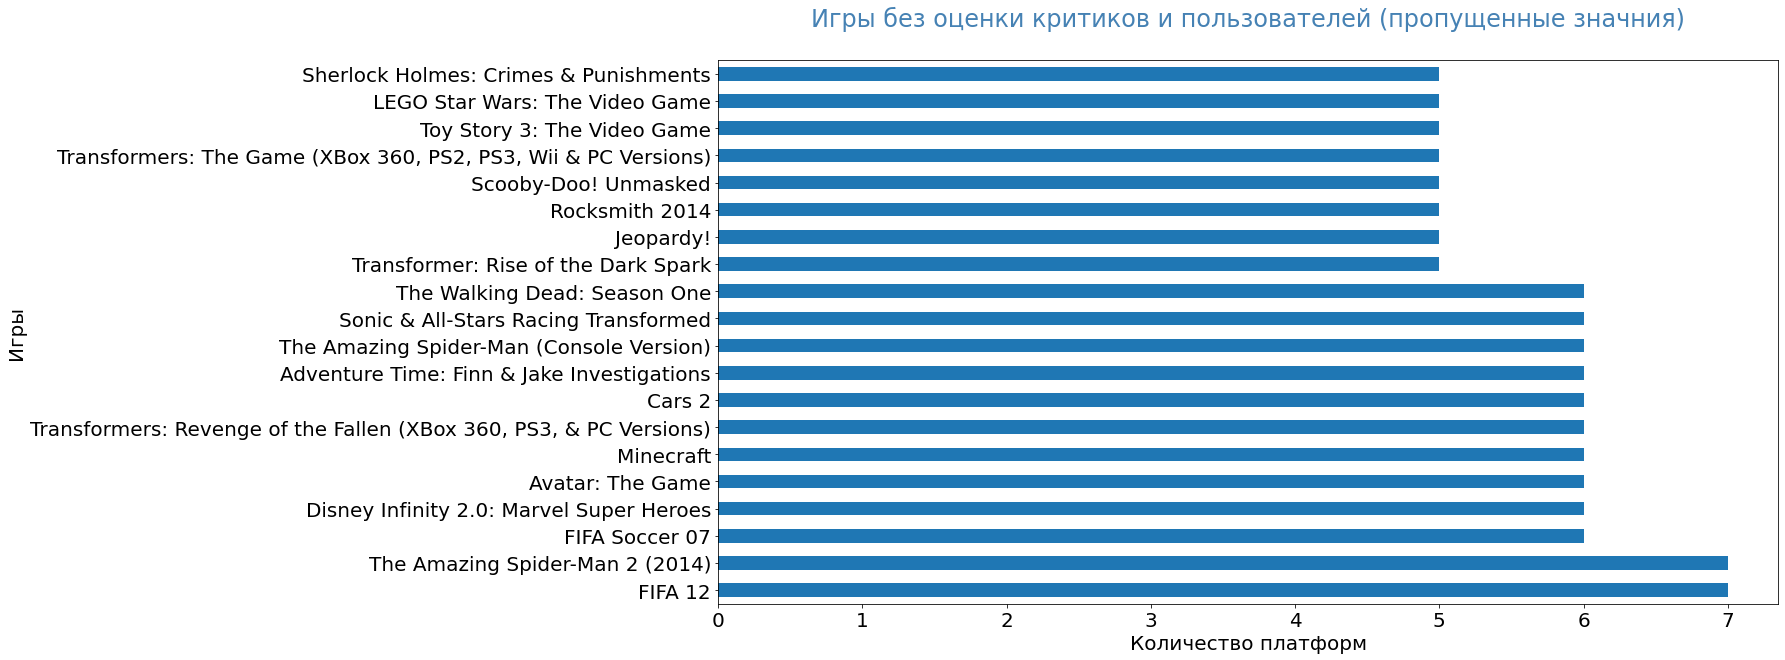

In [17]:
(data
 .query('critic_score.isna() and user_score.isna()')
 .pivot_table(index='name', values='platform', aggfunc='count')
 .reset_index()
 .sort_values(by='platform', ascending = False)
 .head(20)
 .plot(y='platform', x='name', kind = 'barh', figsize = (19,10), legend = False, fontsize = 20)
 .set_title('Игры без оценки критиков и пользователей (пропущенные значния)' + "\n", fontsize = 24, color = 'SteelBlue')
);

plt.ylabel("Игры", fontsize=20);
plt.xlabel("Количество платформ", fontsize=20);

Выявлено что для 5 946 игр одновременно пропущены значения в столбцах *critic_score* и *user_score*.

Предполагаемые причины пропусков:
- малоизвестные/не популярные игры не оценивались критиками/пользователями;
- в разных странах/материках (Северная Америка, Европа, Япония) существуют разные сайты, на которых критики/пользователи публикуют свои оценки. Например, критики европейский стран не посещают японские сайты рейтинга игр и наоборот;
- игра вышла недавно, критики/пользователи не успели протестировать и оценить.

Считаем некорректным заполнять пропуски медианными или средними значениями, по следующим причинам:
1) одна и та же игра на разных платформах может быть по разному реализована => разные оценки,\
2) год релиза игры для разных платформ разный, следовательно, в новых версиях могут быть доработки, неучтенные для других платформ с более ранним выпуском игры. 

In [18]:
data['critic_score'] = data['critic_score'].fillna(-1000)

**Вывод:**\
К пропущенным значениям в столбце `critic_score` применили "загрушку" == -1000, с целью исключения:
- потери значительного количества записей, 
- появления аномалий, в при заполнении средними или медианными значениями.

Не заменяли пропущенные значения на "ноль", т.к. возможен такой вариант оценки критиками.

##### Анализ и заполнение пропусков в столбце `user_score`

In [19]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце выявлена на аббревиатура 'tbd'. Отдельно разберем это значение.\
[TBD или To Be Determined](https://www.metacritic.com/faq) - аббревиатура используется если игра имеет недостаточное количество отзывов для определения рейтинга пользователей (информация получена из открытых источников - сайт *metacritic.com*).

Такаим образом, значение *tbd* аналогично пропущенному значению *Nan*. Заменим значения в столбце `user_score` аналогично столбцу `critic_score`.

In [20]:
data['user_score'] = data['user_score'].fillna(-1000)
data['user_score'] = data['user_score'].replace('tbd', -1000)

Преобразуем данные в тип *float*:

In [21]:
data['user_score'] = data['user_score'].astype('float64')

In [22]:
#check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16446 non-null  int64  
 1   name             16444 non-null  object 
 2   platform         16446 non-null  object 
 3   year_of_release  16446 non-null  Int64  
 4   genre            16444 non-null  object 
 5   na_sales         16446 non-null  float64
 6   eu_sales         16446 non-null  float64
 7   jp_sales         16446 non-null  float64
 8   other_sales      16446 non-null  float64
 9   critic_score     16446 non-null  float64
 10  user_score       16446 non-null  float64
 11  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Вывод:\
Замена данных выполнена корректно.

##### Анализ и заполнение пропусков в столбце `rating`

In [23]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [24]:
data['rating'] = data['rating'].fillna('nan_rating')

[ESRB не оценивает онлайн-игры](https://www.esrb.org/ratings-guide/), т.к. нельзы предсказать, что пользователи увидят или услышать онлайн.\
[ESRB](https://www.overclockers.ua/games/cruelty-esrb/) отдает видео геймплея и кат-сцен своим трем анонимным рейтерам, а затем сверяет их оценки и сравнивает с подобными случаями в прошлом. Кстати, рейтерами могут быть люди самых разных профессий, но выбираются они все же с учетом их кругозора в мире видеоигр и опыта работы с детьми. Анонимность рейтеров необходима, чтобы с ними не могли связаться ни пресса, ни издатели.

Таким образом, мы не может аналитическими методами заполнить пропущенные значения.\
**Вывод:**\
Заменили пропуски на "nan_rating".

Удалим две строки с пропущенными значениями в столбцах `name` и `genre`. Удаление двух строк не нанесут существенное искожение данным для последующего анализа.

In [25]:
data.query('name.isna()')

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
652,659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,-1000.0,-1000.0,nan_rating
14022,14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,-1000.0,-1000.0,nan_rating


In [26]:
data.dropna(subset=['name'], inplace=True)

In [27]:
#check
data.isna().sum()

index              0
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

##### Создание столбца `total_sales`  суммарные продажи во всех регионах

In [28]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [29]:
#check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16445
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16444 non-null  int64  
 1   name             16444 non-null  object 
 2   platform         16444 non-null  object 
 3   year_of_release  16444 non-null  Int64  
 4   genre            16444 non-null  object 
 5   na_sales         16444 non-null  float64
 6   eu_sales         16444 non-null  float64
 7   jp_sales         16444 non-null  float64
 8   other_sales      16444 non-null  float64
 9   critic_score     16444 non-null  float64
 10  user_score       16444 non-null  float64
 11  rating           16444 non-null  object 
 12  total_sales      16444 non-null  float64
dtypes: Int64(1), float64(7), int64(1), object(4)
memory usage: 1.8+ MB


**Вывод**

- данные столбцов `year_of_release` и `user_score` преобразованы в типы int и float соответственно,
- принято решение не заполнять медианными или средними значениями пропуски в столбцах `critic_score` и `user_score`, в связи с отсутствием необходимой информации и в целях избежания искажения информации для последующего анализа,
- оценки пользователей и критиков могут существенно отличаться, т.е. данные не взаимосвязаны=> не можем заполинть пропуски в столбце `user_score` основываясь на оценках критиков и наоборот.\
    Критики оценивают игру комплексно: график, сюжет, техническая реализация. Пользователи дают оценку в основном основываясь на эмоциях и внутренних ощущениях от процесса.
- в столбцах `critic_score` и `user_score` поставлены *заглушки* == "-1000", столбец `rating` оставлен без изенений. При анализе `rating` исключим пропущенные значения из датасета,
- удалены две строки с пропущенными значениями в столбцах `name` и `genre`, т.к. не окажут существенного влияния на дальнейший анализ и не приведет к смещению оценок.

### Исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы. 

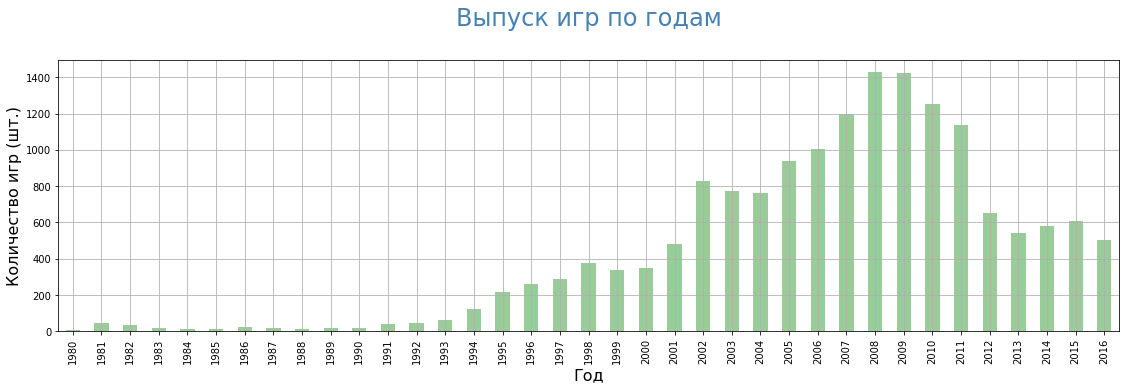

In [30]:
(
    data
    .query('~year_of_release.isna()')
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(y = 'name', kind = 'bar', figsize = (19,5), grid=True, legend=False, color='green', alpha=.4)
    .set_title('Выпуск игр по годам\n', fontsize = 24, color = 'SteelBlue')
);
plt.xlabel("Год", fontsize=16);
plt.ylabel("Количество игр (шт.)", fontsize=16);

На графике видим рост выпуска игр, начиная с 2001 года. [Согласно информации, полученной из открытых источников](https://translated.turbopages.org/proxy_u/en-ru.ru.2a0303d6-63c5751d-029bcde4-74722d776562/https/en.wikipedia.org/wiki/2001_in_video_games),  в 2001 году были выпущены три основные игровые системы:
- GameCube.
- Game Boy Advance от Nintendo, 
- Xbox от Microsoft.
В январе 2001 года Sega объявила, что производство Dreamcast будет прекращено в марте. Так что Nintendo Wii и последующие консоли были нацелены уже на отличную от Sony аудиторию.
Следует отметить, что до 2000-х годов не каждый пользователь мог иметь доступ к скоростному интернету. Данный факт также оказал влияние на популярность игр среди компьютерных пользователей.

Основной пик приходится на 2008-2009 гг. Если до 2008 года заметен устойчивый рост ежегодного выпуска игр, то, начиная с 2010 г., на графике обратную ситуацию - спад количества выпускаемых игр. Полагаем, что спад вызван тем, что мобильные телефоны получили большее распространение + пользователи получили возможность играть с использованием мобильного телефона.

**Вывод:**
Для текущего исследования, а именно, определения:
* самых популярных платформ (топ-5),
* самых популярных жанров (топ-5),
* оценки влияния рейтинга ESRB на продажи в отдельном регионе,

До 1995 г. игр выпускалось крайне мало => нецелесообразно анализировать периоды до 1994-1995 гг. 

#### Анализ изменения продаж по платформам. Выбор платформы с наибольшими суммарными продажами и построение распределения по годам. Определение характерного срока появления новых и исчезновения старых платформ.

**Построим график суммарных продаж компьютерных игр в разрезе каждой платформы:**

In [31]:
(
    data[['total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score',  'user_score']]
    .query('critic_score != -1000 and user_score != -1000')
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,total_sales,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,"6,894.00","6,894.00","6,894.00","6,894.00","6,894.00","6,894.00","6,894.00"
min,0.01,0.00,0.00,0.00,0.00,13.00,0.50
max,82.54,41.36,28.96,6.50,10.57,98.00,9.60


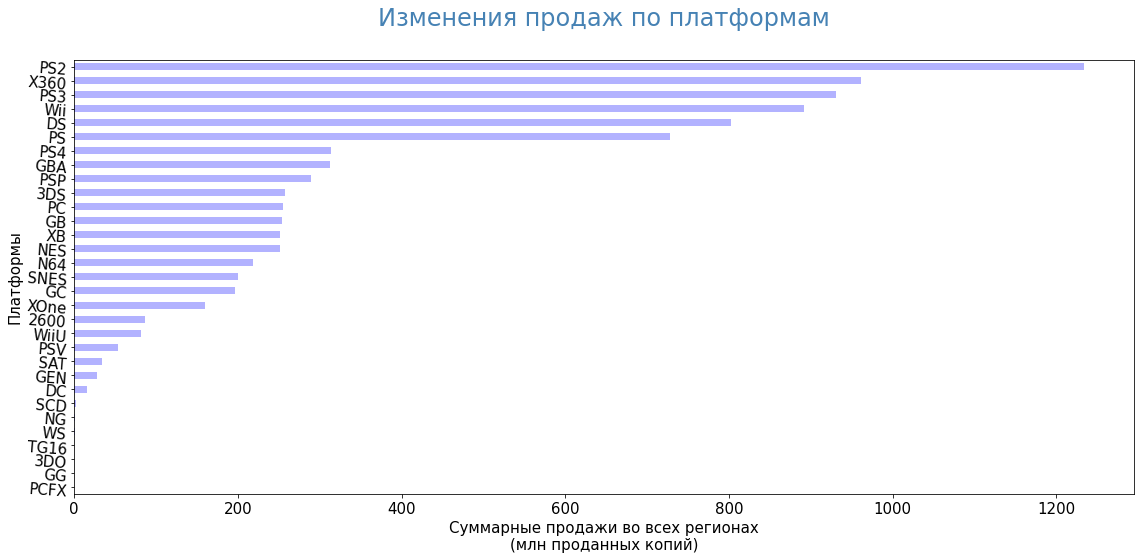

In [32]:
(data
 .pivot_table(index='platform', values='total_sales', aggfunc='sum')
 .reset_index()
 .sort_values(by='total_sales', ascending = True)
 .plot(y='total_sales', x='platform', kind = 'barh', figsize = (19,8), legend = False, fontsize = 15, rot=-4, color='blue',
      alpha=.3)
 .set_title('Изменения продаж по платформам' + "\n", fontsize = 24, color = 'SteelBlue')
);

plt.ylabel("Платформы", fontsize=15);
plt.xlabel("Суммарные продажи во всех регионах" + "\n(млн проданных копий)", fontsize=15);

**С помощью графика определим топ-10 платформ с наибольшими суммарными продажами:**

In [33]:
top_platform = (
    data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending = False)
    .reset_index()
    .head(10)
)
top_platform['percent'] = (top_platform['total_sales'] / (top_platform['total_sales'].sum()) * 100).round(2)
top_platform = top_platform.set_index('platform')
top_platform

,total_sales,percent
platform,,
PS2,1233.56,18.35
X360,961.24,14.30
PS3,931.34,13.86
Wii,891.18,13.26
DS,802.78,11.94
PS,727.58,10.82
PS4,314.14,4.67
GBA,312.88,4.65
PSP,289.53,4.31


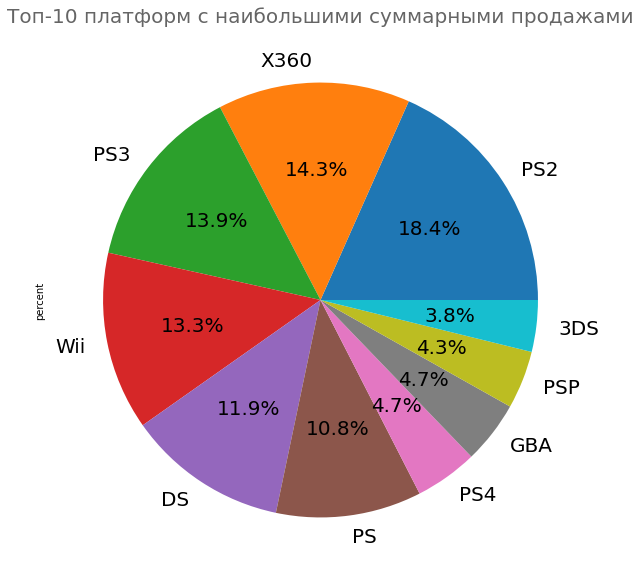

In [34]:
(
    top_platform['percent']
    .plot(kind = 'pie', figsize = (20,10), fontsize = 20, subplots=True, autopct='%.1f%%')
);

plt.title('Топ-10 платформ с наибольшими суммарными продажами', fontsize = 20, color='k', alpha=.6);

**Построим распределение суммарных продаж по годам в разрезе топ-10 платформ:**

Сформируем сводную таблицу с группировкой по платформам и столбцам:

In [35]:
top_platform_sum = (
    data
    .query('~year_of_release.isna()')
    .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
    .reset_index()
)

Для постраения графика нам необходимо только по топ-10 платформам оставить данные о продажах по годам.\
Для этого выполним ряд действия по обработке и фильтрации данных:
1) таблица `top_platform_sum` содержит все наименования платформ + суммы продаж *по годам*,\
2) таблица `top_platform` содержит наименования и % продаж только по топ-10 платформ *без* информации о годах продаж,\
3) с помощью метода `merge` по столбцу `platform` соединим две таблицы,\
4) удалиим строки, содержащие Nan в столбце `percent`, т.к. Nan проставлены по платформам, которые не вошли в топ-10.\
Таким образом, мы получили датасет со всей необходимой информацией для построения графиков.

In [36]:
top_platform_sum = top_platform_sum.merge(top_platform, how='outer', on='platform')

In [37]:
top_platform_sum = top_platform_sum.query('~total_sales_y.isna()')

In [38]:
top_platform_sum = top_platform_sum[['platform', 'year_of_release', 'total_sales_x']]
top_platform_sum = top_platform_sum.reset_index(drop=True)

Проверим, что обработка данных выполнена корректно и итоговые суммы в таблице `top_platform_sum` соответствуют исходным данным по топ-10 платформам из таблицы `top_platform`:

In [39]:
check = (
    top_platform_sum
    .pivot_table(index='platform', values='total_sales_x', aggfunc='sum')
    .reset_index()
    .sort_values(by='total_sales_x', ascending = False)
    .merge(top_platform, how='outer', on='platform')
)
check['diff'] = (check['total_sales_x'] - check['total_sales']).round(0)
check

,platform,total_sales_x,total_sales,percent,diff
0,PS2,1233.56,1233.56,18.35,0.0
1,X360,961.24,961.24,14.30,0.0
2,PS3,931.34,931.34,13.86,0.0
3,Wii,891.18,891.18,13.26,0.0
4,DS,802.78,802.78,11.94,0.0
5,PS,727.58,727.58,10.82,0.0
6,PS4,314.14,314.14,4.67,0.0
7,GBA,312.88,312.88,4.65,0.0
8,PSP,289.53,289.53,4.31,0.0
9,3DS,257.81,257.81,3.84,0.0


Вывод:\
Обработка данных выполнена корректно, отклонения отсутствуют.

In [40]:
top_platform_sum

,platform,year_of_release,total_sales_x
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78
...,...,...,...
92,X360,2012,99.74
93,X360,2013,88.58
94,X360,2014,34.74
95,X360,2015,11.96


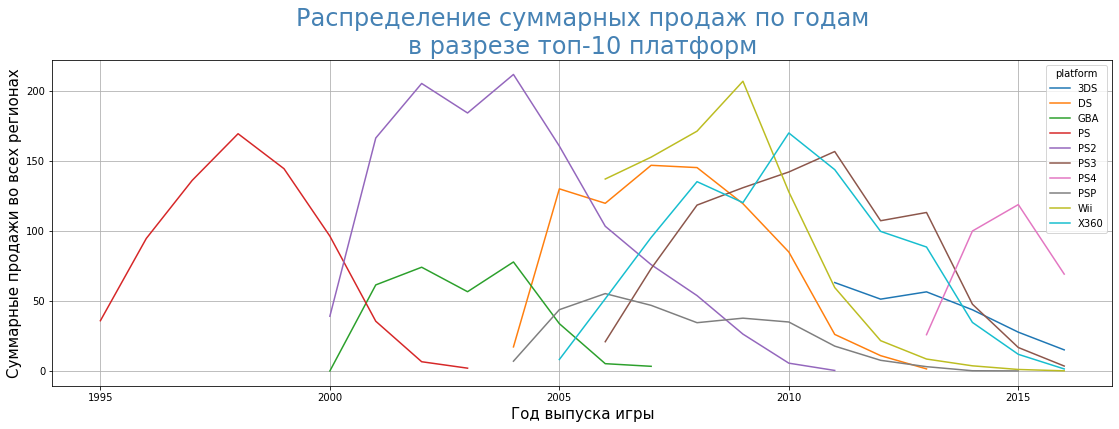

In [41]:
(
    top_platform_sum
    .query('year_of_release >= 1995')
    .pivot_table(index='year_of_release', columns = 'platform', values='total_sales_x', aggfunc='sum')
    .plot(grid=True, figsize=(19, 6))
    .set_title('Распределение суммарных продаж по годам' + "\nв разрезе топ-10 платформ", fontsize = 24, color = 'SteelBlue')
)
plt.ylabel("Суммарные продажи во всех регионах", fontsize=15);
plt.xlabel("Год выпуска игры", fontsize=15);
plt.show()

Рассчитаем продолжительность существования топ-10 платфом:

In [42]:
platform_live_mean = (
    top_platform_sum
    .query('year_of_release >= 1995')
    .pivot_table(index='platform', values='year_of_release', aggfunc=['max', 'min'])
)

In [43]:
platform_live_mean['existence_period'] = platform_live_mean['max'] - platform_live_mean['min']

In [44]:
platform_live_mean

,max,min,existence_period
,year_of_release,year_of_release,
platform,,,
3DS,2016,2011,5
DS,2013,2004,9
GBA,2007,2000,7
PS,2003,1995,8
PS2,2011,2000,11
PS3,2016,2006,10
PS4,2016,2013,3
PSP,2015,2004,11


In [45]:
#средний срок существования платформ
platform_live_mean['existence_period'].mean()

8.5

**Вывод:**\
С учетом данных графика и расчета среднего существования платформ - в среднем характерный срок появления новых и исчезновения старых платформ **8,5 лет**.\
В первые 2-4 года с момента выпуска игры заметен рост продаж, в последующие 4-5 лет существования платформы на графике видим спад. Например, по графику явно прослеживается следующая тенденция у платформ:
1) платформа Wii:\
    рост с 2006 по 2009,
    спад с 2010 по 2016.\
2) платформа Ds:\
    рост с 2004 по 2007,
    спад с 2009 по 2013.\
3) платформа PS3:\
    рост с 2006 по 2011,
    спад с 2013 по 2015.\
4) платформа PS2:\
    рост с 2000 по 2004,
    спад с 2006 по 2011.\
Данная динамика может быть обусловлена тем, что в среднем каждые 3 года выходят новые платформы и спрос на старые снижается + пользователи постепенно переходят со старых платформ на новые.

#### Выбор актуального периода для построения прогноза на 2017 год.

Возьмем данные за соответствующий актуальный период. Актуальный период определяем самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год
С учетом периода среднего существования платформ, актуальным периодом для нас будет 2012 - 2016 г. Данный период является наиболее корректным, в учетом следующих факторов:
1. из анализа исключены пики развития компьютерных игр (2008-2009 гг.), т.к. в последующие периоды такие резкие скачки роста отсутствуют,
2. период с 2012-2016 г. наиболее достоверно отражает сокращение выпуска игр и слабую изменчивость рынка,
3. в анализ попадают новые платформы, т.е. мы исключили платформы старого поколения, которые по сосоянию на 2016 г. либо уже не существуют, либо близки к завершению существования,
4. активный период продажи игр приходится наплатформы нового покаления, т.е. выпускать игры для старых платформ - бессмыслено, поэтому новые платформы способствуют увеличению спроса на игры.

In [46]:
data_curr_period = (
    data
    .query('year_of_release >= 2012')
    .drop(['index'], axis=1)
    .reset_index(drop=True)
)

Исключим из анализа платформы, которые прекратили свое существование:

In [47]:
data_curr_period.pivot_table(index='platform', values='year_of_release', aggfunc=['max', 'min'])

,max,min
,year_of_release,year_of_release
platform,,
3DS,2016,2012
DS,2013,2012
PC,2016,2012
PS3,2016,2012
PS4,2016,2013
PSP,2015,2012
PSV,2016,2012
Wii,2016,2012


Вывод:\
Из датасета необходимо исключить платформы *DS* и *PSP* в связи с прекращением их существования.

In [48]:
data_curr_period = (
    data_curr_period
    .query('platform != "DS" and platform != "PSP"')
    .reset_index(drop=True)
)

In [49]:
data_curr_period.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1000.0,-1000.0,nan_rating,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1000.0,-1000.0,nan_rating,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
5,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
7,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1000.0,-1000.0,nan_rating,11.68
8,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
9,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


#### Выявление лидирующих по продажам платформ, их рост или падение. Выберем несколько потенциально прибыльных платформ.

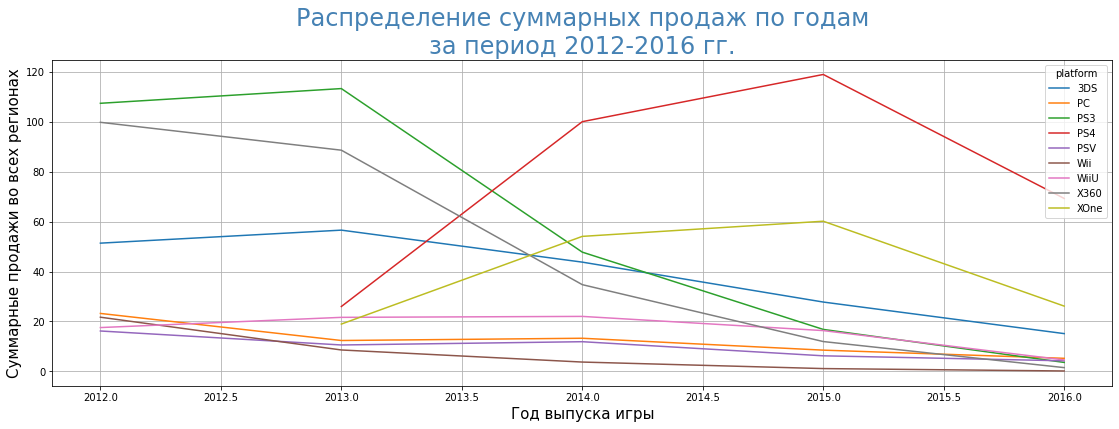

In [50]:
(
    data_curr_period
    .pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(19, 6))
    .set_title('Распределение суммарных продаж по годам' + "\nза период 2012-2016 гг.", fontsize = 24, color = 'SteelBlue')
)
plt.ylabel("Суммарные продажи во всех регионах", fontsize=15);
plt.xlabel("Год выпуска игры", fontsize=15);
plt.show()

**Вывод:**\
По сумме продаж в 2016 г. лидируют платформы:\
*1 место* - PS4,\
*2 место* - XOne,\
*3 место* - 3DS.\
Остальные платформы примерно в одном диапазоне.

По данным графика `Распределение суммарных продаж по годам за период c 2012-2016 гг.` делаем вывод, что продажи компьютерных игр снижаются.

Потенциально прибыльными считаем платформы *PS4* и *XOne*. Продажи компьютерных игр для данных платформ превышают ~25 млн копий. Приставки Х360 и PS3 имели высокие продажи в 2012-2013 г., но в последующие годы на графике заметен стремительный спад, который обоснован выходом приставок нового поколения XOne и PS4.

#### График «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [51]:
data_curr_period.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,493.0,0.585781,1.462855,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09
X360,292.0,0.810068,1.712069,0.01,0.1000,0.31,0.8700,16.27
XOne,247.0,0.645020,1.036139,0.01,0.0600,0.22,0.6850,7.39


In [52]:
data_curr_period['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV'],
      dtype=object)

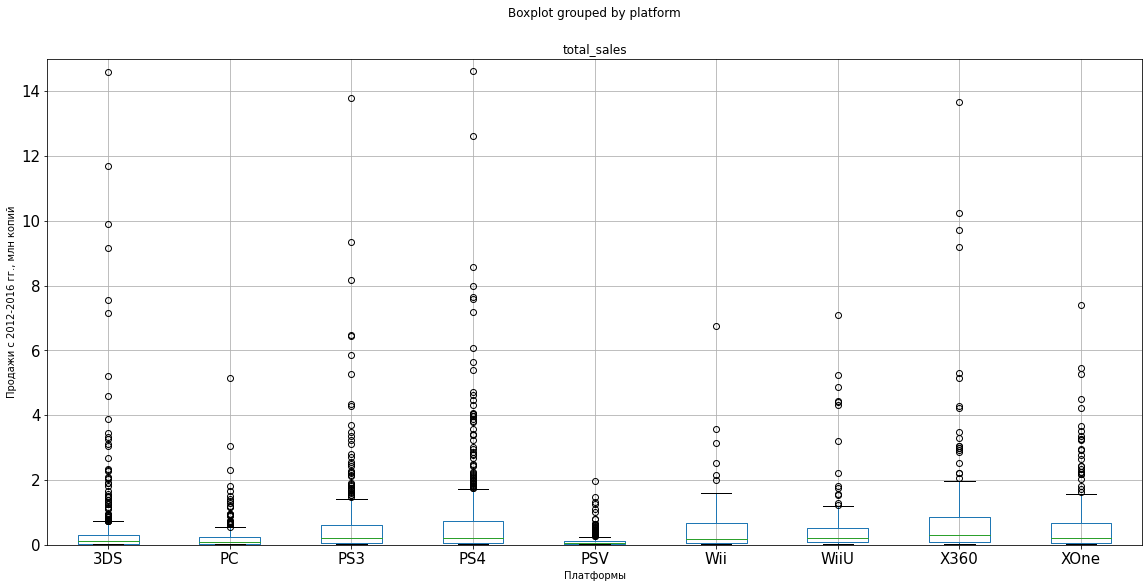

In [53]:
(
    data_curr_period
    .boxplot(by='platform', column='total_sales', fontsize=15, figsize=(19,9))
    .set(ylim=(0, 15))
);
plt.xlabel('Платформы');
plt.ylabel('Продажи c 2012-2016 гг., млн копий');

Имеют четкую тенденцию к снижению продаж платформы:
*PC, PSV, WiiU*

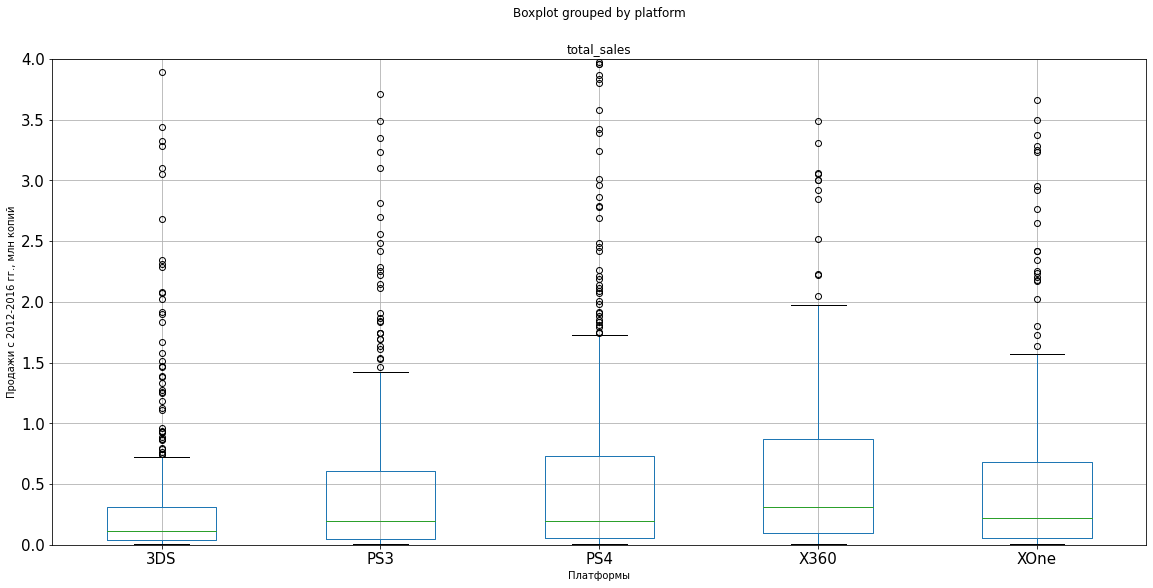

In [54]:
(
    data_curr_period
    .query('platform == ["PS3", "PS4", "X360", "XOne", "3DS"]')
    .boxplot(by='platform', column='total_sales', fontsize=15, figsize=(19,9))
    .set(ylim=(0, 4))
);
plt.xlabel('Платформы');
plt.ylabel('Продажи c 2012-2016 гг., млн копий');

Большое количество выбросов имеют платформы *PS4, PS3, X360 и 3DS*.\
На выбросы для платформ *PS4 и 3DS* оказали влияние следующие факторы:
1. приставки относятся к новому поколению (дата выпуска 2011 г. для 3DS и 2013 г. для PS4) => рост продаж,
2. отличаются от предшественников высокой производмтельностью,
3. переход пользователей с платформ старого покаления на платформы нового поколения,
4. производство  новых игр для платформ => рост спрос и продаж.

Выбросы платформ старого поколения *PS3 и X360* вероятнее всего пришлись на пик их активности, т.е. 2012-2013 г. В связи с выходом приставок нового поколения, продажи игр для PS3 и X360 значительно снизились, о чем свидетельствует существенный разрыв между средним и медианным значениями.

Следует отметить, что на графике boxplot платформы PS4 и XOne имеют схожие значения по продажам игр. Данный факт обусловлен тем, что производители (Sony и Microsoft) этих приставок являются конкурентами, каждый из которых заинтересован в продаже большего количества игр, чем у конкурента и ,как следствие, максимальном завоевании рынка на старте выпуска приставок.

По итогам спада продаж *PS3 и X360* можно сделать вывод, что для X360 было продано больше копий игр, чем для PS3:\
медианное количество продаж игр для платформы X360 превысило количество копий, проданных для PS3 (0.31 против 0.20). Разница между средними показателями продаж существеннее: 0,81 для Х360 и 0,58 для PS3. Отметим, что 25 % продаж игр для Х360 превысили 0,9 млн копия, в то время как у PS3 данный показатель достиг только 0,6 млн копий.

#### Оценка влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков. Диаграмма рассеяния и корреляция между отзывами и продажами.

Рассмотрим влияние отзывов критиков и пользователей на продажи игр для платформ PS4 и XOne:

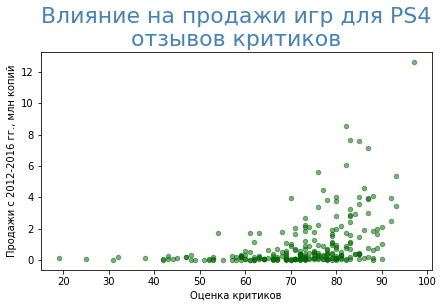

In [55]:
(
    data_curr_period
    .loc[(data_curr_period['user_score'] != -1000) & (data_curr_period['critic_score'] != -1000) 
         & (data_curr_period['platform'] == 'PS4')]
    .plot(x='critic_score', y='total_sales', figsize=(7,4), kind='scatter', color='#006400', alpha=0.5)
    .set_title('Влияние на продажи игр для PS4' + "\nотзывов критиков", fontsize = 22, color = 'SteelBlue')
);
plt.xlabel('Оценка критиков');
plt.ylabel('Продажи c 2012-2016 гг., млн копий');

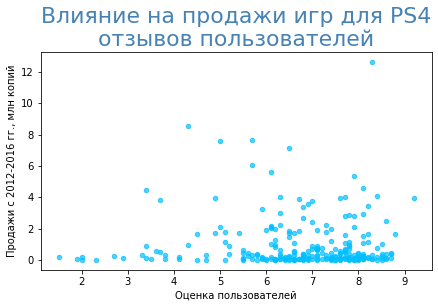

In [56]:
(
    data_curr_period
    .loc[(data_curr_period['user_score'] != -1000) & (data_curr_period['critic_score'] != -1000) 
         & (data_curr_period['platform'] == 'PS4')]
    .plot(x='user_score', y='total_sales', figsize=(7,4), kind='scatter', color='#00BFFF', alpha=0.7)
    .set_title('Влияние на продажи игр для PS4' + "\nотзывов пользователей", fontsize = 22, color = 'SteelBlue')
);
plt.xlabel('Оценка пользователей');
plt.ylabel('Продажи c 2012-2016 гг., млн копий');

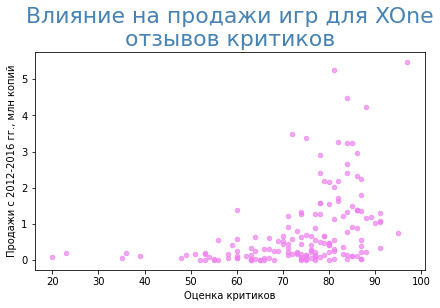

In [57]:
(
    data_curr_period
    .loc[(data_curr_period['user_score'] != -1000) & (data_curr_period['critic_score'] != -1000) 
         & (data_curr_period['platform'] == 'XOne')]
    .plot(x='critic_score', y='total_sales', figsize=(7,4), kind='scatter', color='#EE82EE', alpha=0.7)
    .set_title('Влияние на продажи игр для XOne' + "\nотзывов критиков", fontsize = 22, color = 'SteelBlue')
);
plt.xlabel('Оценка критиков');
plt.ylabel('Продажи c 2012-2016 гг., млн копий');

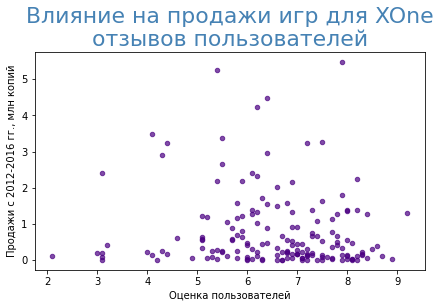

In [58]:
(
    data_curr_period
    .loc[(data_curr_period['user_score'] != -1000) & (data_curr_period['critic_score'] != -1000) & (data_curr_period['platform'] == 'XOne')]
    .plot(x='user_score', y='total_sales', figsize=(7,4), kind='scatter', color='#4B0082', alpha=0.7)
    .set_title('Влияние на продажи игр для XOne' + "\nотзывов пользователей", fontsize = 22, color = 'SteelBlue')
);
plt.xlabel('Оценка пользователей');
plt.ylabel('Продажи c 2012-2016 гг., млн копий');

Посчитайем корреляцию между отзывами и продажами:

In [59]:
(
    data_curr_period
    .loc[(data_curr_period['user_score'] != -1000) & (data_curr_period['critic_score'] != -1000) 
         & (data_curr_period['platform'] == 'PS4')]
    [['user_score', 'critic_score', 'total_sales']]
    .corr()
    .round(2)
)

,user_score,critic_score,total_sales
user_score,1.00,0.56,-0.03
critic_score,0.56,1.00,0.41
total_sales,-0.03,0.41,1.00


In [60]:
(
    data_curr_period
    .loc[(data_curr_period['user_score'] != -1000) & (data_curr_period['critic_score'] != -1000) 
         & (data_curr_period['platform'] == 'XOne')]
    [['user_score', 'critic_score', 'total_sales']]
    .corr()
    .round(2)
)

,user_score,critic_score,total_sales
user_score,1.00,0.47,-0.09
critic_score,0.47,1.00,0.41
total_sales,-0.09,0.41,1.00


**Вывод:**\
По итогам проведенного анализа можем сделать вывод, что влияние отзывов критиков на продажи игр слабое, корреляция положительная, но слабая.\
Влияние отзывов пользователей на продажи - корреляция отрицательная, т.е. количество положительных отзывов не влияет на рост продаж.\
Полагаем, что при выборке игры, пользователи уделяют внимание оценкам критиков, поэтому мы можем наблюдать слабую связь между отзывами критиков и продажами игр.

#### Оценка влияния отзывов пользователей и критиков на продажи игр на других платформах

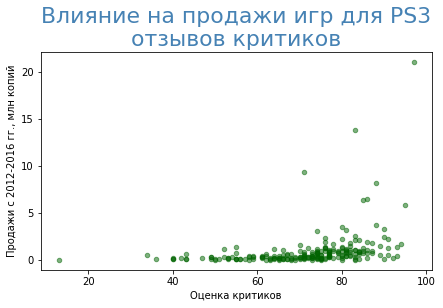

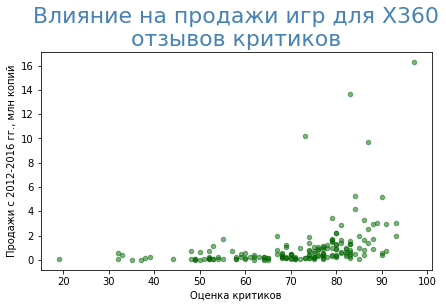

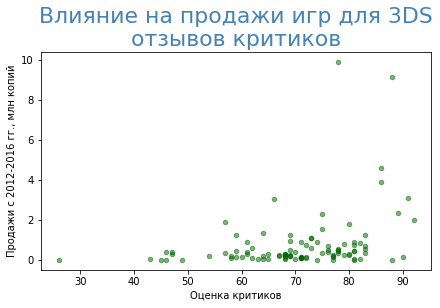

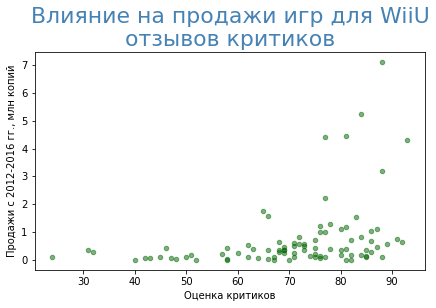

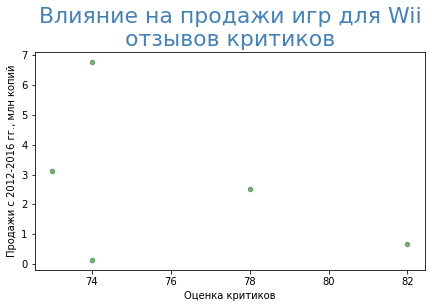

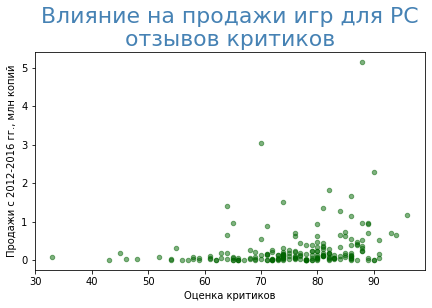

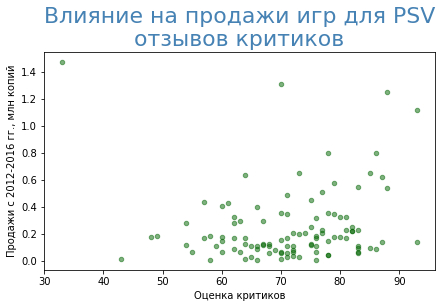

In [61]:
other_platform = ['PS3', 'X360', '3DS', 'WiiU', 'Wii', 'PC', 'PSV']
for i in other_platform:
    (
        data_curr_period
        .loc[(data_curr_period['user_score'] != -1000) & (data_curr_period['critic_score'] != -1000) 
             & (data_curr_period['platform'] == i)]
        .plot(x='critic_score', y='total_sales', figsize=(7,4), kind='scatter', color='#006400', alpha=0.5)
        .set_title('Влияние на продажи игр для' + " " + i + "\nотзывов критиков", fontsize = 22, color = 'SteelBlue')
    );
    plt.xlabel('Оценка критиков');
    plt.ylabel('Продажи c 2012-2016 гг., млн копий');

In [62]:
# create empty table with platforms
correlations = pd.DataFrame (data_curr_period['platform'].unique(),columns=['platform'])
correlations['corr_critic'] = 0
correlations['corr_user'] = 0

In [63]:
for platform_name in data_curr_period['platform'].unique():
    # get dataframe for each platform
    platform_df = data_curr_period[data_curr_period['platform'] == platform_name]
    
    # filter rows where critic_score isNA
    platform_df_1 = platform_df[platform_df['critic_score'] != -1000]
    # calc corr_critic for each platform
    correlations.loc[correlations['platform'] == platform_name, 'corr_critic'] = \
    (platform_df['total_sales'].corr(platform_df_1['critic_score'])).round(3)
    
    # filter rows where critic_score isNA
    platform_df_2 = platform_df[platform_df['critic_score'] != -1000]
    # calc corr_user for each platform
    correlations.loc[correlations['platform'] == platform_name, 'corr_user'] = \
    (platform_df['total_sales'].corr(platform_df_2['user_score'])).round(3)
correlations

,platform,corr_critic,corr_user
0,PS3,0.331,0.032
1,X360,0.361,-0.002
2,PS4,0.407,0.060
3,3DS,0.321,0.098
4,XOne,0.417,0.108
5,WiiU,0.348,0.053
6,Wii,-0.424,0.010
7,PC,0.237,0.028
8,PSV,0.094,0.052


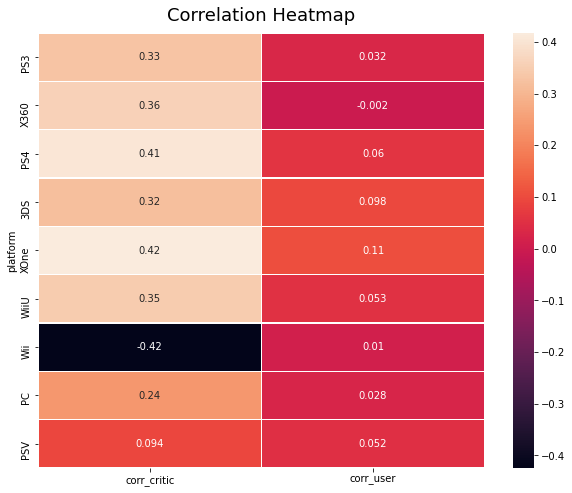

In [64]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    (
    correlations
    .set_index('platform')
    )
    , linewidths=.5, annot=True).set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [85]:
# Код ревьюера
correlations.style.background_gradient(cmap = "coolwarm")

,platform,corr_critic,corr_user
0,PS3,0.331000,0.032000
1,X360,0.361000,-0.002000
2,PS4,0.407000,0.060000
3,3DS,0.321000,0.098000
4,XOne,0.417000,0.108000
5,WiiU,0.348000,0.053000
6,Wii,-0.424000,0.010000
7,PC,0.237000,0.028000
8,PSV,0.094000,0.052000


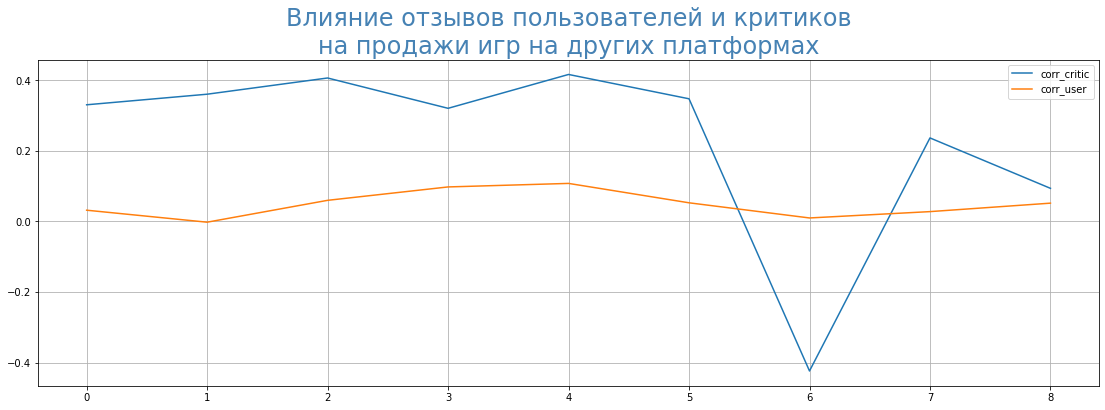

In [65]:
(
    correlations
    .plot(grid=True, figsize=(19, 6))
    .set_title('Влияние отзывов пользователей и критиков' + "\nна продажи игр на других платформах", 
               fontsize = 24, color = 'SteelBlue')
);

**Вывод:**
>Влияние отзывов пользователей на продажи

В целом можем сделать вывод, что влияние отзывов пользователей на продажи игр на других платформах отсутствует, корреляция положительная, но крайне слабая.

>Влияние отзывов критиков на продажи

Влияние отзывов критиков для остальных платформ аналогично влиянию для лидирующих платформ, за исключением платформы *Wii и PS*. Для данной приставки корреляция отрицательная, т.е. влияние оценки критиков на продажи не взаимосвязаны. Платформа *Wii* является платформой старого поколения, год выпуска 2006, аналогично и для платформы PS, которая была выпущена в 1995 г. Для платформ *Wii и PS* отмечали спад продаж игр, т.к. вышли приставки нового поколения. Таким образом, можем сделать вывод, что для этих платформ оценки критиков не могли оказать влияния на рост продаж.

#### Анализ общего распределения игр по жанрам. Оценка самых прибыльных жанров. Выделяются ли жанры с высокими и низкими продажами?

In [66]:
genre_total = (
    data_curr_period
    .pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count'])
    .droplevel(0, axis=1)
    .reset_index()
)

In [67]:
#change columns' name
genre_total.columns = ['genre', 'total_sales_sum', 'total_sales_count']

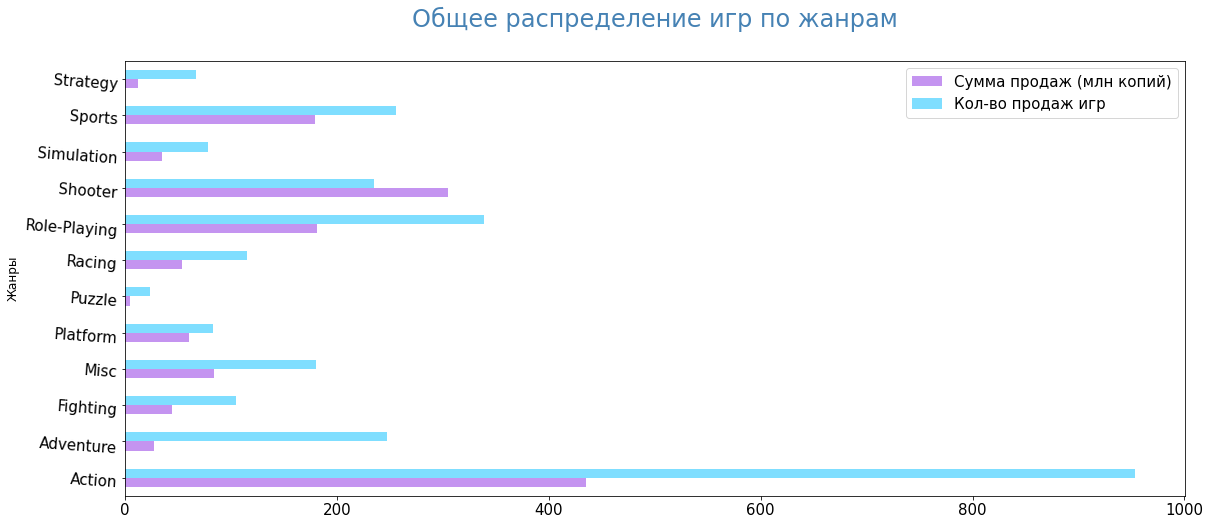

In [68]:
(
    genre_total
    .plot(x='genre', kind = 'barh', figsize = (19,8), legend = True, fontsize = 15, rot=-4,
          alpha=.5, color=['#8A2BE2', '#00BFFF'])
    .set_title('Общее распределение игр по жанрам' + "\n", fontsize = 24, color = 'SteelBlue')
);

plt.ylabel('Жанры', fontsize = 12);
plt.legend(['Сумма продаж (млн копий)', 'Кол-во продаж игр'], fontsize = 15);

In [69]:
display(f'ТОП-10 самых продаваемых игр в разрезе жанров')
display((
     data_curr_period
    .pivot_table(index=['name', 'genre'], values='total_sales', aggfunc='sum')
    .reset_index()
    .set_index('name')
    .sort_values(by='total_sales', ascending=False)
    .head(10)
 ))

'ТОП-10 самых продаваемых игр в разрезе жанров'

,genre,total_sales
name,,
Grand Theft Auto V,Action,56.58
Call of Duty: Black Ops II,Shooter,29.40
Call of Duty: Ghosts,Shooter,27.39
Call of Duty: Black Ops 3,Shooter,25.67
Minecraft,Misc,24.16
Call of Duty: Advanced Warfare,Shooter,21.97
FIFA 15,Sports,17.37
FIFA 16,Sports,16.30
FIFA 14,Sports,16.27


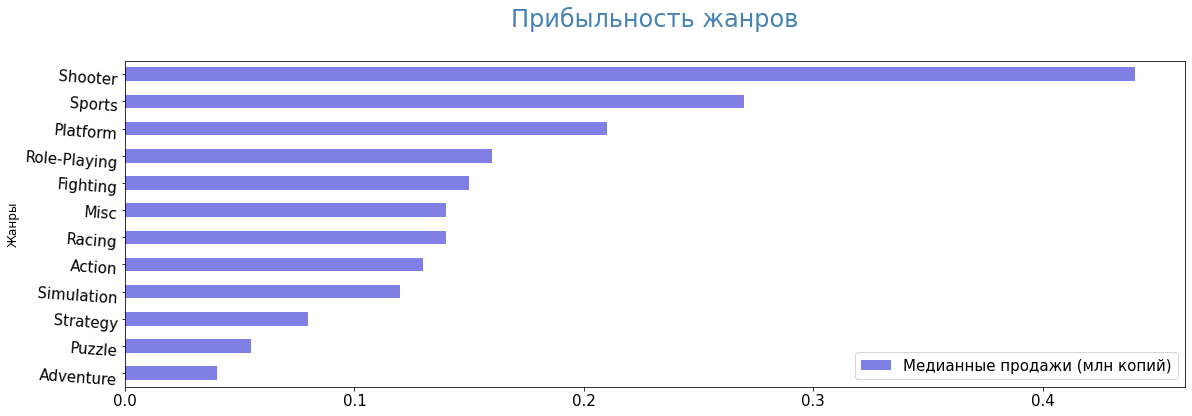

In [70]:
(
    data_curr_period
    .pivot_table(index='genre', values='total_sales', aggfunc='median')
    .reset_index()
    .sort_values(by='total_sales',ascending=True)
    .plot(x='genre', kind = 'barh', figsize = (19,6), legend = True, fontsize = 15, rot=-4,
          alpha=.5, color='#0000CD')
    .set_title('Прибыльность жанров' + "\n", fontsize = 24, color = 'SteelBlue')
);

plt.ylabel('Жанры', fontsize = 12);
plt.legend(['Медианные продажи (млн копий)'], fontsize = 15);

Лидерами продаж являются жанры:\
*Action* - более 400 млн продаж.\
Затем жанры по популярности распределяются в следующем порядке:
- Shooter 300 млн продаж,
- Role-Playing и Sports ~200 млн продаж.

Аутсайдерами являются жанры:
- Advanture ~30 млн продаж,
- Strategy ~10 млн продаж,
- Puzzle ~1 млн продаж.

Наиболее прибыльные жанры:
- Shooter - средний доход более 0,4 млн продаж,
- Sports в среднем продают около 0,25 млн игр,
- Platform - медианные продажи ~0.21 млн.


У жанра Role-Playing болше игр, чем у Shooter, однако, продается больше игр жанра Shooter. Вероятная причина того, что жанр Shooter уступает жанру Role-Playing по количеству игр - для создания игр Shooter необходимо больше ресурсов=> себестоимость/затраты выше.

Не всегда от популярности жанра зависит популярность игры. Приведем для примера исключения:
1) в ТОП-10 самых продаваемых игр, не вошла игра жанра Role-Playing,\
2) в топе игра Minecraft жанра Misc, который не входит в тройку популярных жанров. 

**Вывод:**
* выявили тенденцию спада продаж игр для всех платформ,
* самыми популярными платформами являются: PS4, XOne и 3DS,
* потенциально прибыльными считаем платформы PS4 и XOne,
* платформы PS4 и XOne имеют схожие значения по продажам игр (по итогам анализа boxplot). Данный факт обусловлен тем, что производители этих приставок являются конкурентами (Sony и Microsoft),
* влияние отзывов критиков на продажи игр слабое, в то время как отзывы пользователей не оказывают влияния на продажи,
* наиболее прибыльными являются жанры Action, Shooter и Role-Playing.

### Составление портрета пользователя каждого региона

#### Самые популярные платформы (топ-5) для пользователя каждого региона (NA, EU, JP). 

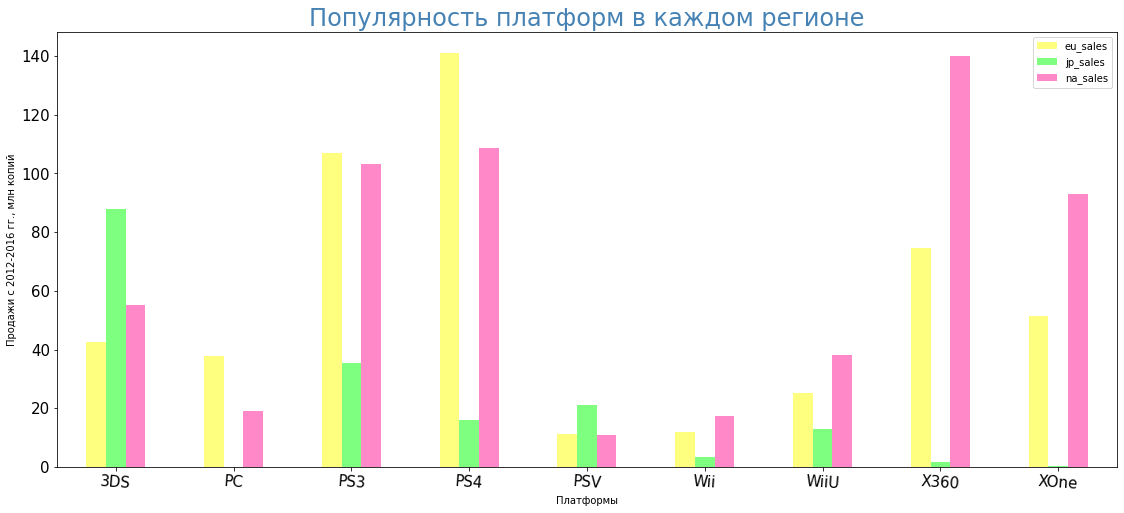

In [71]:
(
    data_curr_period[['platform', 'na_sales', 'eu_sales', 'jp_sales']]
    .pivot_table(index='platform', aggfunc='sum')
    .reset_index()
    .plot(x='platform', kind = 'bar', figsize = (19,8), legend = True, 
          fontsize = 15, rot=-4, alpha=.5, color=['#FFFF00', '#00FF00', '#FF1493'])
    .set_title('Популярность платформ в каждом регионе', fontsize = 24, color = 'SteelBlue')
);
plt.xlabel('Платформы');
plt.ylabel('Продажи c 2012-2016 гг., млн копий');

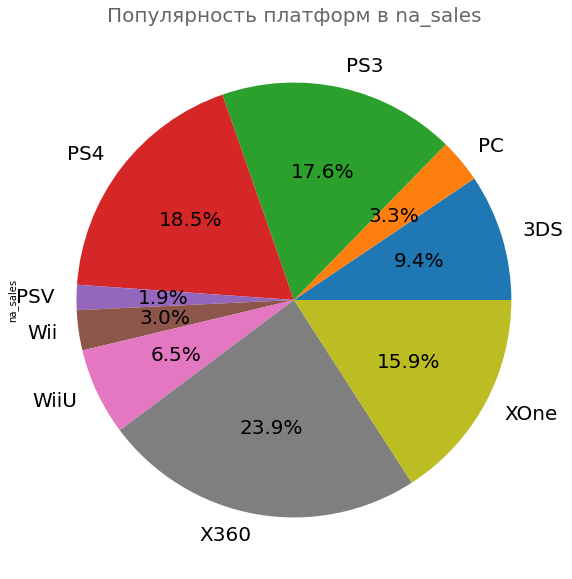

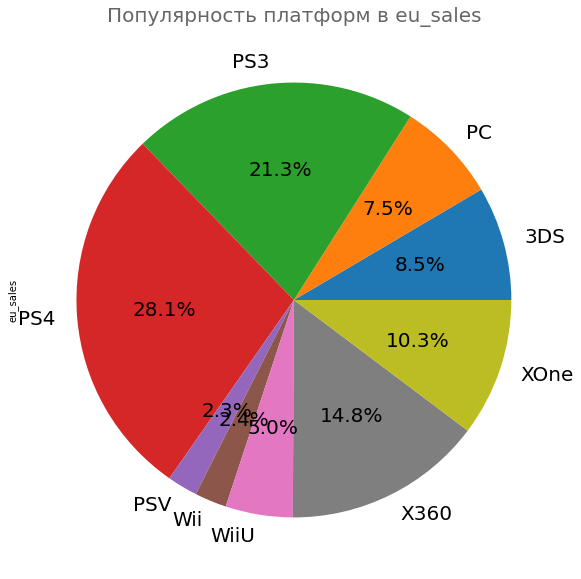

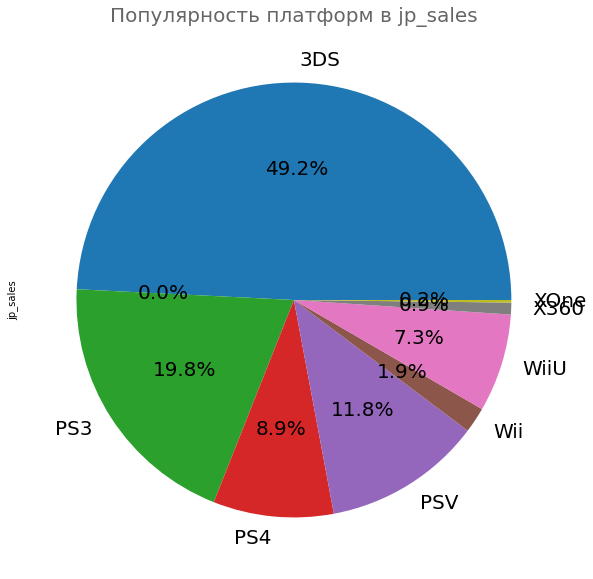

In [72]:
for col in data_curr_period[['na_sales', 'eu_sales', 'jp_sales']]:
    (
        data_curr_period
        .pivot_table(index='platform', values=col, aggfunc='sum')
        .reset_index()
        .set_index('platform')
        [col]
        .plot(kind = 'pie', figsize = (20,10), fontsize = 20, subplots=True, autopct='%.1f%%')
    );
    plt.title(f'Популярность платформ в {col}', fontsize = 20, color='k', alpha=.6);
    plt.show()

>Топ-5 популярных платформ для Северной Америки
- X360 (продано 140 млн копий) - 24%,
- PS4 (продано 110 млн копий) - 19%,
- PS3 (продано 105 млн копий) - 18%,
- XOne (продано 100 млн копий),
- 3DS (продано 90 млн копий).

>Топ-5 популярных платформ для Европы
- PS4 (продано 140 млн копий) - 28%,
- PS3 (продано 110 млн копий) - 21%,
- X360 (продано 80 млн копий) - 15%,
- XOne (продано 50 млн копий),
- 3DS (продано 40 млн копий).

>Топ-5 популярных платформ для Японии
- 3DS (продано 90 млн копий) - 49%,
- PS3 (продано 35 млн копий) - 20%,
- PSV (продано 20 млн копий) - 12%,
- PS4 (продано 19 млн копий),
- WiiU (продано 17 млн копий).

В Японии наибольшую попуплярность имеет платформа местного производства, в целом в Японии продажи игр значительно ниже, чем для Северной Америки и Европы. Данный вывод можно объяснит предпочтением пользователей Японии играть с мобильных устройств.\
В Европе и Америке наиболее поппулярными являются приставки: X360, PS4, PS3.

#### Самые популярные жанры (топ-5).

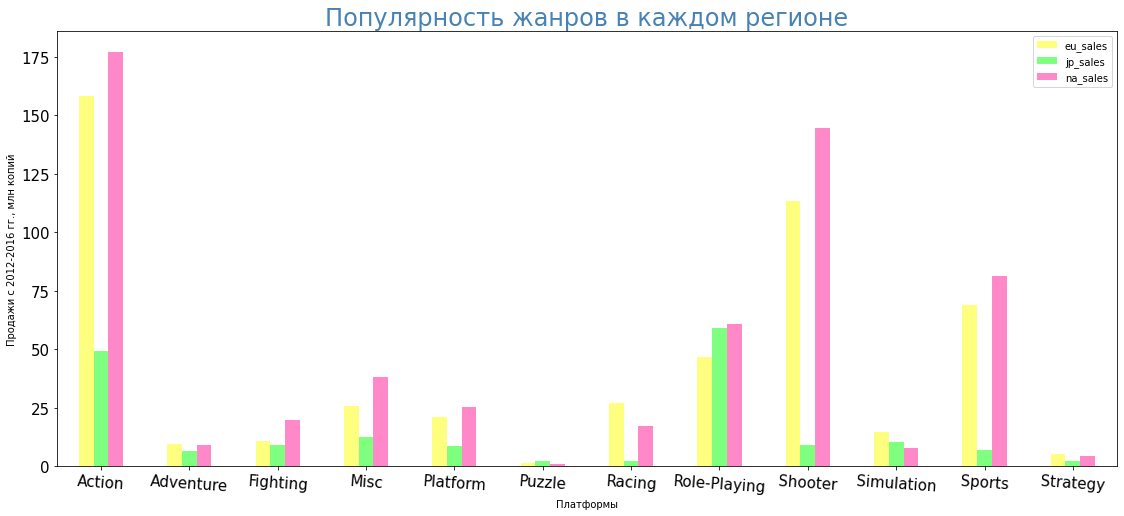

In [73]:
(
    data_curr_period[['genre', 'na_sales', 'eu_sales', 'jp_sales']]
    .pivot_table(index='genre', aggfunc='sum')
    .reset_index()
    .plot(x='genre', kind = 'bar', figsize = (19,8), legend = True, 
          fontsize = 15, rot=-4, alpha=.5, color=['#FFFF00', '#00FF00', '#FF1493'])
    .set_title('Популярность жанров в каждом регионе', fontsize = 24, color = 'SteelBlue')
);
plt.xlabel('Платформы');
plt.ylabel('Продажи c 2012-2016 гг., млн копий');

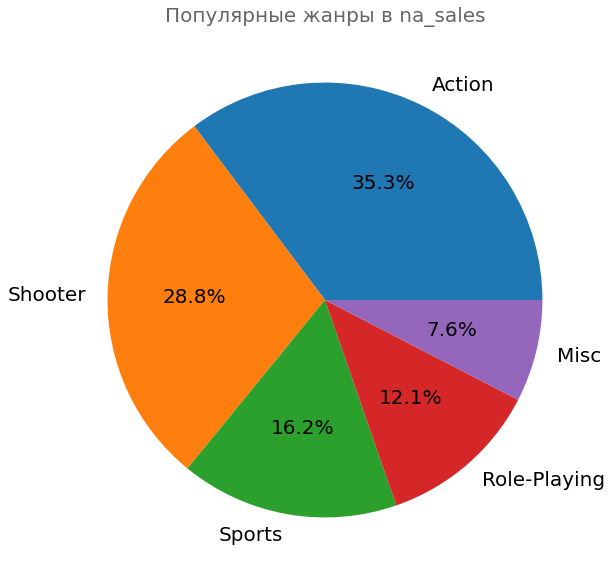

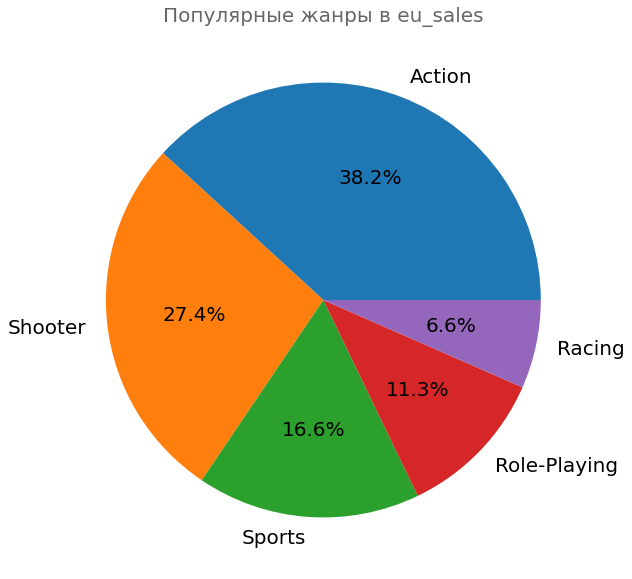

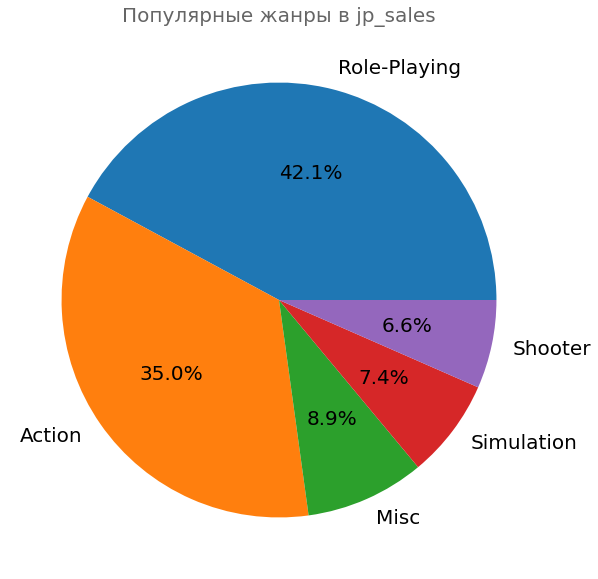

In [74]:
for col in data_curr_period[['na_sales', 'eu_sales', 'jp_sales']]:
    (
        data_curr_period
        .pivot_table(index='genre', values=col, aggfunc='sum')
        .reset_index()
        .sort_values(col, ascending=False).head(5)
        .set_index('genre')
        [col]
        .plot(kind = 'pie', ylabel='', figsize = (20,10), fontsize = 20, autopct='%.1f%%')
    );
    plt.title(f'Популярные жанры в {col}', fontsize = 20, color='k', alpha=.6);
    plt.show()

>Топ-5 популярных жанров для Северной Америки
- Action - 30%,
- Shooter - 25%,
- Sports - 14%,
- Role-Playing - 10%,
- Misc - 7%.

>Топ-5 популярных жанров для Европы
- Action - 32%,
- Shooter - 23%,
- Sports - 14%,
- Role-Playing - 9%,
- Racing - 6%.

>Топ-5 популярных жанров для Японии
- Role-Playing - 33%,
- Action - 28%,
- Misc - 7%,
- Simulation - 6%,
- Shooter - 5%.

Для Северной Америки и Европы вкусовые предпочтения у пользователей схожи.
Совсем иные жанры популярны в Японии - компьютерные ролевые игры. По нашему мнению, данное жанр популярен в Японии в связи с высоким уровнем социальной изоляции в японском обществе, постоянные переработки и, как следствие, одиночество.

#### Влияние рейтинга ESRB на продажи в отдельных регионах.

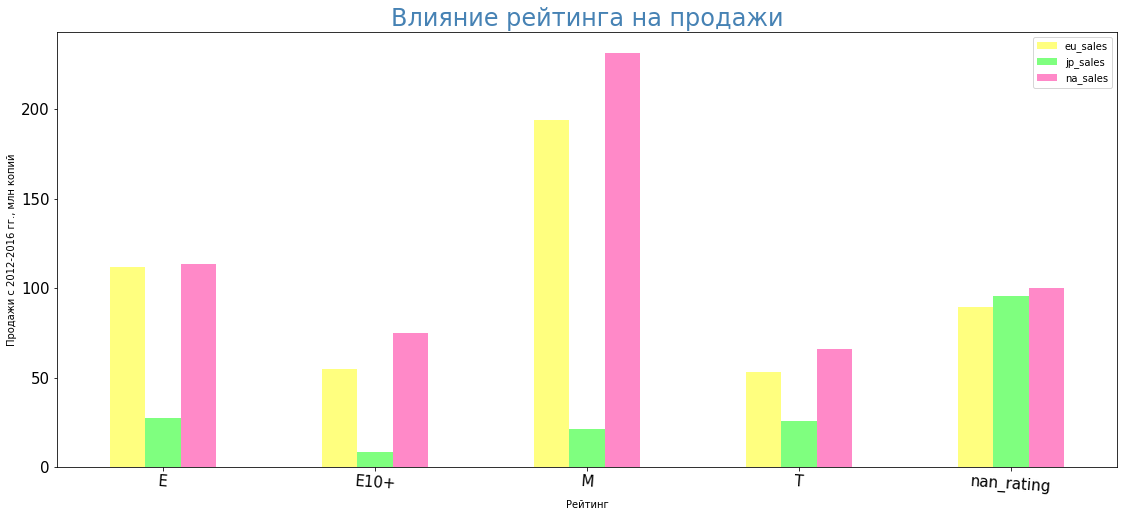

In [75]:
(
    data_curr_period[['rating', 'na_sales', 'eu_sales', 'jp_sales']]
    .pivot_table(index='rating', aggfunc='sum')
    .reset_index()
    .plot(x='rating', kind = 'bar', figsize = (19,8), legend = True, 
          fontsize = 15, rot=-4, alpha=.5, color=['#FFFF00', '#00FF00', '#FF1493'])
    .set_title('Влияние рейтинга на продажи', fontsize = 24, color = 'SteelBlue')
);
plt.xlabel('Рейтинг');
plt.ylabel('Продажи c 2012-2016 гг., млн копий');

Справочная информация по обозначениям рейтингов :
1. М - подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков.
2. Е - подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика.
3. E 10+ - подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. 
4. Т - подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия.

В Америке и Европе наибольшие продажи у игр с рейтингом *М и Е*. Игры без рейтинга не уступают в популярности играм с рейтингом *Е*.\
В Японии лидирующее место занимают игры без рейтинга, замет идут игры с рейтингом *Т и Е*. Лидирование игр без рейтинг можно объяснить возможным наличием там своего стандарта для рейтингов.

###  Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Метод проверки гипотезы о равенстве средних двух генераллных совокупностей.
1. **Нулевая гипотеза:**
    средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. **Альтернативная гипотеза:**
    средние пользовательские рейтинги платформ Xbox One и PC не равны (разные).
Альтернативная гипотеза является двусторонней, потому что имеет возможное отклонение в большую и в меньшую стороны. 

In [76]:
#выборка XOne
user_score_xbox = data_curr_period.loc[(data_curr_period['platform'] == 'XOne') 
                                       & (data_curr_period['user_score'] != -1000)]['user_score']
#выборка PC
user_score_pc = data_curr_period.loc[(data_curr_period['platform'] == 'PC') 
                                       & (data_curr_period['user_score'] != -1000)]['user_score']


alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    user_score_xbox, 
    user_score_pc,
    equal_var = False) #предполагаем, что дисперсии у генеральных совокупностей разные, 
                        #т.к. пользователи разных стран, достатка, интересов и пр.

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Значение p-value показывает: вероятность **случайно** получить разные пользовательские рейтинги составляет 55%.\
**Вывод:** Опровергнуть нулевую гипотезу о равенстве средних рейтингов в результате статистического теста не удалось.

#### Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства.
1. **Нулевая гипотеза:**
    средние пользовательские рейтинги жанров Action и Sports одинаковые.
2. **Альтернативная гипотеза:**
    средние пользовательские рейтинги жанров Action и Sports не равны (разные).
Альтернативная гипотеза является двусторонней, потому что имеет возможное отклонение в большую и в меньшую стороны. 

In [77]:
#выборка Action
user_score_action = data_curr_period.loc[(data_curr_period['genre'] == 'Action') 
                                       & (data_curr_period['user_score'] != -1000)]['user_score']
#выборка Sports
user_score_sports = data_curr_period.loc[(data_curr_period['genre'] == 'Sports') 
                                       & (data_curr_period['user_score'] != -1000)]['user_score']


alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    user_score_action, 
    user_score_sports,
    equal_var = False) #предполагаем, что дисперсии у генеральных совокупностей разные, 
                        #т.к. пользователи разных стран, достатка, интересов и пр.

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 5.161357435438797e-20
Отвергаем нулевую гипотезу


Разница между p-value и  alpha достаточно велика, то есть вероятность её получить случайно очень низка. Данная разница является статистически значимой, — вероятность, что она окажется такой случайно, ниже выбранного уровня значимости.\
Вывод:\
Средние пользовательские рейтинги жанров Action и Sports **разные**=> наше предположение подтвердилось.

### Общий вывод

* выявлена тенденция спада продаж компьютерных игр для всех платформ,
* самыми популярными платформами являются: PS4, XOne и 3DS - платформы нового поколения, которые смемтили с конкурентной борьбы платформы старого поколения,
* потенциально прибыльными считаем платформы PS4 и XOne.\
  Платформы PS4 и XOne имеют схожие значения по продажам игр, т.к. производители этих приставок являются конкурентами (Sony и Microsoft),
* характерный срок появления новых и исчезновения старых платформ - 4 года. Общий средний срок существования платформы - 8,5 лет
* влияние отзывов критиков на продажи игр есть, но слабое, в то время как отзывы пользователей не оказывают влияния на продажи, * наиболее прибыльными являются игры следующих жанров:
 > Action,
 Shooter,
Role-Playing.

* вкусовые предпочтения пользователей Северной Америки и Европы достаточно схожи. В Японии - значительно отличаются. Подробный анализ представлен ниже в подразделе *Справочная информация*.

**Рекомендации:**
* обратить свое внимание на игры для мобильных устройств,
* ориентироваться на продажу игр для платформ нового поколения,
* учитывать отзывы критиков при выборе игр для продажи - критерий не основной для выбора, но существует слабая взаимосвязь между уровнем продаж и оценкой критика,
* в целях минимизации расходов ориентироваться на продажи в Северную Америку и Европу. Спрос пользователей из Японии сильно отличается, т.е. это допольнительные затраты на покупку игр специально для рынка Японии.

*Справочная информация*\
Для Северной Америки и Европы в ТОП-5 популярных жанров вошли:
>   **I.** Action,\
    **II.** Shooter,\
    **III.** Sports,\
    **IV.** Role-Playing,\
    **V.** Misc(Racing - для Европы).
    
    Для Японии ТОП-5 популярных жанров составили:
>   **I.** Role-Playing - 33%,\
    **II.** Action - 28%,\
    **III.** Misc - 7%,\
    **IV.** Simulation - 6%,\
    **V.** Shooter - 5%.
    
    Рейтинг* наиболее продаваемых игр (*ESRB):
>   В Америке и Европе наибольшие продажи у игр с рейтингом М, Е и без рейтинга. Продажи игр с рейтингом Е и без рейтинга схожи.\
>   В Японии лидирующее место занимают игры без рейтинга, замет идут игры с рейтингом Т и Е.


    ТОП-5 популярных платформ для Северной Америки и Европы:
>   
    * X360,
    * PS4,
    * PS3,
    * XOne,
    * 3DS.
    
    Популярые платформы для Японии: 
>   3DS (49% продаж игр для этой платформы), все остальные сильно остают по количеству продаж.
